# V1: DQN

## Instalações

In [ ]:
!pip install tensordict
# Esse pacote é uma biblioteca que fornece um dicionário de tensores
# (estrutura de dados para armazenar e manipular múltiplos tensores, que são fundamentais em muitas operações de aprendizado de máquina e computação científica).
!pip install torchrl
# Este pacote é relacionado ao uso da biblioteca PyTorch para Reinforcement Learning (RL, ou Aprendizado por Reforço).
# torchrl é um complemento focado em fornecer ferramentas e utilitários específicos para Aprendizado por Reforço.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install --upgrade torch torchvision
# torch refere-se ao PyTorch,
# biblioteca de aprendizado de máquina utilizada para aplicações de deep learning, especialmente em visão computacional e processamento de linguagem natural.
# torchvision é uma biblioteca que complementa o PyTorch com ferramentas específicas para visão computacional.
# Ela inclui conjuntos de dados (datasets) populares, modelos de redes neurais pré-treinados, e funções para transformar imagens.

In [ ]:
!pip install av
# av é uma biblioteca de Python que proporciona uma interface simplificada para a manipulação de áudio e vídeo.
# Esta biblioteca é um contêiner sobre a popular biblioteca de multimídia FFmpeg,
# que é capaz de decodificar, codificar, transcodificar, mux, demux, stream, filtrar e reproduzir praticamente tudo que os seres humanos e máquinas criaram.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 11.7 MB/s eta 0:00:00


## Importações

In [ ]:
import torch #  permitindo operações avançadas de aprendizado de máquina e manipulação de tensores.
import time #  oferece funcionalidades relacionadas ao tempo, como obter a hora atual, pausar a execução do programa, e medir intervalos de tempo.

In [ ]:
import torchvision  # fornece:
# Modelos de redes neurais pré-treinados.
# Conjuntos de dados populares para visão computacional.
# Ferramentas para transformar e manipular imagens.
# Utilitários adicionais para facilitar o trabalho com dados de imagem.

In [ ]:
import numpy as np

In [ ]:
from torchrl.envs import GymEnv, StepCounter, TransformedEnv
# GymEnv: Classe que integra ambientes do OpenAI Gym com a biblioteca torchrl, permitindo o uso de ambientes padrão de Reinforcement Learning.
# StepCounter: Um wrapper para contar o número de passos realizados em um ambiente.
# TransformedEnv: Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas.
from torchrl.modules import EGreedyModule, MLP, QValueModule
# EGreedyModule: Implementa uma política epsilon-greedy, que escolhe ações aleatoriamente com probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# MLP: Multi-Layer Perceptron, uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# QValueModule: Um módulo específico para calcular valores Q, usados em algoritmos de Q-learning.
from torchrl.collectors import SyncDataCollector
# SyncDataCollector: Coletor de dados síncrono, usado para coletar experiências do ambiente de forma síncrona, que é necessário para treinar modelos de RL.
from torchrl.data import LazyTensorStorage, ReplayBuffer
# LazyTensorStorage: Armazena tensores de maneira eficiente, com carregamento atrasado.
# ReplayBuffer: Buffer de replay, usado para armazenar e amostrar experiências anteriores, crucial para métodos de RL como DQN.
from torchrl.objectives import DQNLoss, SoftUpdate
# DQNLoss: Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
# SoftUpdate: Função para atualização suave dos parâmetros do modelo, frequentemente usada em algoritmos de RL para atualizar gradualmente uma rede alvo.
from torchrl._utils import logger as torchrl_logger
# logger: Utilitário de registro (logging) usado internamente pela biblioteca torchrl para registrar mensagens de depuração e informações durante a execução.
from torchrl.record import CSVLogger, VideoRecorder
# CSVLogger: Logger que registra dados em um arquivo CSV, útil para monitorar o treinamento e resultados.
# VideoRecorder: Grava vídeos das execuções dos ambientes, útil para visualizar o comportamento de agentes de RL.

from tensordict.nn import TensorDictModule as Mod, TensorDictSequential as Seq
# TensorDictModule (Mod): Um módulo que opera sobre TensorDicts, que são dicionários especializados em armazenar tensores.
# TensorDictSequential (Seq): Similar ao torch.nn.Sequential, mas opera sobre TensorDicts,
# permitindo a construção de modelos sequenciais que trabalham com múltiplos tensores de entrada e saída.

from torch.optim import Adam
# Adam: Um otimizador amplamente utilizado, que combina as vantagens dos métodos AdaGrad e RMSProp,
# ajustando os passos de atualização com base em estimativas de momentos de primeira e segunda ordem dos gradientes.

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Construindo o ambiente - OK

Estaremos usando um ambiente de academia com uma StepCounter transformação. Se precisar de uma atualização, verifique se esses recursos são apresentados no tutorial do ambiente .

In [ ]:
torch.manual_seed(0) # define a semente manual para a geração de números aleatórios no PyTorch, garantindo a reprodutibilidade dos resultados.
env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
# cria um ambiente de RL para o ambiente "CartPole-v1" do OpenAI Gym, com um contador de passos adicionado como uma transformação ao ambiente.
env.set_seed(0) # define a semente para o ambiente env, garantindo a consistência do comportamento do ambiente em diferentes execuções.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


795726461

## Projetando uma política - OK

O próximo passo é construir nossa política. Faremos uma versão regular e determinística do ator para ser usada no módulo de perda e durante a avaliação . A seguir, iremos aumentá-lo com um módulo de exploração para inferência .

In [ ]:
# Essa linha cria uma MLP que mapeia observações do ambiente para valores de ação, com duas camadas ocultas de 64 neurônios cada.
value_mlp = MLP(out_features=env.action_spec.shape[-1], num_cells=[64, 64])
# MLP: Refere-se a um Multi-Layer Perceptron (MLP), uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# out_features=env.action_spec.shape[-1]: Define o número de neurônios na camada de saída da MLP.
# env.action_spec.shape[-1] é a dimensão do espaço de ações do ambiente, o que significa que a MLP vai produzir um valor para cada ação possível no ambiente.
# num_cells=[64, 64]: Define a arquitetura da MLP, com duas camadas ocultas, cada uma contendo 64 neurônios.

# Essa linha cria um módulo que pega as observações do ambiente (observation) e produz valores de ação (action_value) usando a MLP definida anteriormente.
value_net = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])
# Mod: Refere-se ao TensorDictModule, que é um módulo que opera sobre TensorDicts.
# value_mlp: A MLP criada na linha anterior.
# in_keys=["observation"]: Define as chaves de entrada para o módulo. Aqui, o módulo espera uma chave chamada observation no TensorDict de entrada.
# out_keys=["action_value"]: Define as chaves de saída para o módulo. O módulo irá produzir uma chave chamada action_value no TensorDict de saída.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
# Cria uma política que primeiro passa a observação através da value_net para obter os valores de ação
# e, em seguida, usa o QValueModule para calcular os valores Q para as ações.
policy = Seq(value_net, QValueModule(spec=env.action_spec))
# Seq: Refere-se ao TensorDictSequential, que é similar ao torch.nn.Sequential, mas opera sobre TensorDicts.
# value_net: O módulo criado na linha anterior.
# QValueModule(spec=env.action_spec): Um módulo específico para calcular valores Q, usado em algoritmos de Q-learning.
# spec=env.action_spec fornece as especificações do espaço de ações do ambiente.

# Cria um módulo de exploração que implementa uma estratégia epsilon-greedy com um valor inicial de epsilon de 0.5 e que diminui ao longo de 100.000 passos.
exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=100_000, eps_init=0.5)
# exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=345, eps_init=1)
# EGreedyModule: Implementa política epsilon-greedy, que escolhe ações aleatoriamente com certa probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# env.action_spec: As especificações do espaço de ações do ambiente.
# annealing_num_steps=100_000: Define o número de passos durante os quais o valor de epsilon será reduzido gradualmente (annealing).
# eps_init=0.5: Define o valor inicial de epsilon. No início, 50% das ações serão escolhidas aleatoriamente.

# Essa linha combina a política com o módulo de exploração em uma sequência, resultando em uma política que primeiro calcula os valores de ação
# e, em seguida, aplica a estratégia epsilon-greedy para selecionar as ações.
policy_explore = Seq(policy, exploration_module)  # Seq: Refere-se ao TensorDictSequential.
# policy: A política definida anteriormente.
# exploration_module: O módulo de exploração epsilon-greedy definido na linha anterior.

Passando de e- decay = 0,98 para propocional em passos:

\begin{align}
 ϵ_{\mbox{inicial}} * ϵ_{\mbox{decay}}^{n_p} = ϵ_{\mbox{mínimo}}
\end{align}

\begin{align}
 n_p = (\frac{\log ϵ_{\mbox{mínimo}} - \log ϵ_{\mbox{inicial}} }{\log ϵ_{\mbox{decay}}})
\end{align}

\begin{align}
 n_p ≈ 345
\end{align}



## Coletor de dados e buffer de reprodução

Aí vem a parte dos dados: precisamos de um coletor de dados para obter facilmente lotes de dados e um buffer de reprodução para armazenar esses dados para treinamento.

In [ ]:
init_rand_steps = 5000    # Define o número inicial de passos aleatórios a serem realizados no ambiente antes de começar a usar a política treinada.
frames_per_batch = 200    # Define o número de frames (ou passos de tempo) que serão coletados em cada lote (batch) de coleta de dados do ambiente.
optim_steps = 10          # Define o número de passos de otimização que serão realizados após cada lote de coleta de dados.
# Isso controla quantas atualizações dos pesos da rede neural serão feitas com base nos dados coletados.

# SyncDataCollector: Um coletor de dados síncrono que coleta experiências do ambiente usando a política fornecida.
collector = SyncDataCollector(
    env,                                  # env: O ambiente de RL, criado anteriormente com TransformedEnv.
    policy,                               # policy: A política usada para coletar experiências do ambiente.
    # policy_explore,
    frames_per_batch=frames_per_batch,    # frames_per_batch=frames_per_batch: Especifica que 200 frames serão coletados em cada lote.
    total_frames=-1,                      # total_frames=-1: Especifica que o coletor deve continuar indefinidamente (ou até que seja explicitamente parado).
    init_random_frames=init_rand_steps,   # init_random_frames=init_rand_steps: 5000 passos aleatórios realizados inicialmente p/ preencher o rb.
)

rb = ReplayBuffer(storage=LazyTensorStorage(100_000)) # Buffer de replay usado p/ armazenar experiências anteriores p/ amostragem durante o treinamento.
# LazyTensorStorage(100_000): Um armazenamento eficiente de tensores que pode armazenar até 100.000 transições.

## Módulo de perda e otimizador - Ok

Construímos nossa perda conforme indicado no tutorial dedicado , com seu otimizador e atualizador de parâmetros de destino:

In [ ]:
#  Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True)
# value_network=policy: A rede de valor utilizada para calcular os valores Q. Aqui, policy é a política criada anteriormente, que inclui o QValueModule.
# action_space=env.action_spec: Especifica o espaço de ações do ambiente, utilizado para calcular os valores Q para todas as ações possíveis.
# delay_value=True: Indica que a rede alvo (target network) deve ser usada para calcular os valores Q futuros, o que é uma técnica comum para estabilizar o treinamento em DQN.

# Um otimizador amplamente utilizado que combina as vantagens dos métodos AdaGrad e RMSProp. É particularmente eficiente para grandes problemas de aprendizado de máquina com muitos parâmetros.
optim = Adam(loss.parameters(), lr=0.02)
# loss.parameters(): Passa os parâmetros da função de perda (que incluem os parâmetros da rede de valor) para o otimizador.
# lr=0.02: Define a taxa de aprendizado (learning rate) como 0.02. Esta taxa controla o tamanho dos passos de atualização dos pesos da rede neural durante o treinamento.

# Implementa a atualização suave dos parâmetros da rede, uma técnica comum em algoritmos de RL para atualizar gradualmente uma rede alvo (target network) com os parâmetros da rede de valor (online network).
updater = SoftUpdate(loss, eps=0.99)
# loss: A função de perda que contém os parâmetros da rede de valor e da rede alvo.
# eps=0.99: Define o fator de atualização suave (soft update factor).
# eps=0.99 indica que 99% dos parâmetros da rede alvo são mantidos e apenas 1% é atualizado a partir da rede de valor em cada passo.

## Registrador

Usaremos um registrador CSV para registrar nossos resultados e salvar vídeos renderizados.

In [ ]:
path = "./training_loop" # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.

# CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
logger = CSVLogger(exp_name="dqn", log_dir=path, video_format="mp4")
# exp_name="dqn": Nome da experiência, usado como um identificador para os logs. Aqui, é definido como "dqn" (Deep Q-Network).
# log_dir=path: Diretório onde os logs serão salvos. Neste caso, é o diretório definido anteriormente, ./training_loop.
# video_format="mp4": Especifica o formato de vídeo para gravação. Aqui, está configurado para MP4.

# Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
video_recorder = VideoRecorder(logger, tag="video")
# logger: O logger criado na linha anterior, que será usado para salvar os vídeos.
# tag="video": Uma tag para identificar os vídeos nos logs. Aqui, está definido como "video".

# Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
record_env = TransformedEnv(GymEnv("CartPole-v1", from_pixels=True, pixels_only=False), video_recorder)
# GymEnv("CartPole-v1", from_pixels=True, pixels_only=False): Cria um ambiente GymEnv para o ambiente "CartPole-v1" do OpenAI Gym.
# from_pixels=True: Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
# pixels_only=False: Indica que tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
# video_recorder: O gravador de vídeos criado na linha anterior, que será usado para gravar as execuções do ambiente.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


## Funções Auxiliares

In [ ]:
def plotar(dados, xlabel = 'Episódio', ylabel = 'Recompensa', title = 'Desempenho do Agente'):
    plt.plot(dados)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Ciclo de treinamento

Em vez de fixar um número específico de iterações a serem executadas, continuaremos treinando a rede até que ela atinja um determinado desempenho (definido arbitrariamente como 200 etapas no ambiente – com CartPole, sucesso é definido como ter trajetórias mais longas).

2024-05-27 23:03:47,953 [torchrl][INFO] Episódios: 300, Record: 500, Tamanho do Buffer 15400
2024-05-27 23:03:48,334 [torchrl][INFO] Episódios: 300, Record: 500, Tamanho do Buffer 15600
2024-05-27 23:03:48,743 [torchrl][INFO] Episódios: 300, Record: 500, Tamanho do Buffer 15800
2024-05-27 23:04:17,924 [torchrl][INFO] Episódios: 400, Record: 500, Tamanho do Buffer 30200
2024-05-27 23:04:18,276 [torchrl][INFO] Episódios: 400, Record: 500, Tamanho do Buffer 30400
2024-05-27 23:04:18,639 [torchrl][INFO] Episódios: 400, Record: 500, Tamanho do Buffer 30600
2024-05-27 23:04:29,663 [torchrl][INFO] Episódios: 500, Record: 500, Tamanho do Buffer 36000
2024-05-27 23:05:20,983 [torchrl][INFO] Episódios: 800, Record: 500, Tamanho do Buffer 61200
2024-05-27 23:06:01,621 [torchrl][INFO] Episódios: 1000, Record: 500, Tamanho do Buffer 80600
2024-05-27 23:07:37,440 [torchrl][INFO] Episódios: 1400, Record: 500, Tamanho do Buffer 100000
2024-05-27 23:09:07,610 [torchrl][INFO] Episódios: 1900, Record: 50

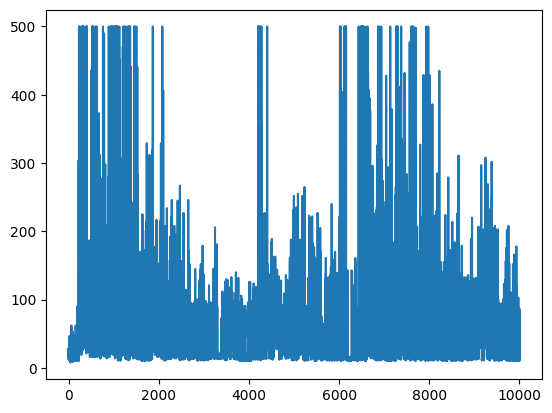

In [ ]:
### Linhas de Inicialização
total_count = 0     # Inicializa um contador para o número total de passos coletados.
total_episodes = 0  # Inicializa um contador para o número total de episódios completados.
X1 = None
score_list_1 = []
t0 = time.time()    # Armazena o tempo de início do treinamento para calcular a duração total no final.

### Loop principal do treinamento.
for i, data in enumerate(collector):

    for X0 in data["next","step_count"]:
      if X1 is not None:
          if X0<X1:
              score_list_1.append(X1.item())
      X1 = X0

    rb.extend(data)                                 # Grava dados no buffer de repetição
    max_length = rb[:]["next", "step_count"].max()  # Calcula o comprimento máx. dos episódios armazenados no buffer de replay, acessando o campo "step_count".

    ### Condição para Iniciar a Otimização
    if len(rb) > init_rand_steps:         # Verifica se o tamanho do buffer de replay é maior que init_rand_steps (5000).
        ### Loop de Otimização
        for _ in range(optim_steps):      # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
            sample = rb.sample(200)       # Amostra 200 transições do buffer de replay.
            loss_vals = loss(sample)      # Calcula os valores de perda usando a amostra
            loss_vals["loss"].backward()  # Calcula os gradientes da perda.
            optim.step()                  # Atualiza os parâmetros da rede usando o otimizador.
            optim.zero_grad()             # Zera os gradientes acumulados para a próxima iteração.

            ### Atualização do Fator de Exploração
            exploration_module.step(data.numel()) # Atualiza o fator de exploração baseado no número de elementos em data.

            ### Atualização dos Parâmetros da Rede-alvo
            updater.step() # Realiza a atualização suave dos parâmetros da rede-alvo.

    ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
    total_count += data.numel()                   # Atualiza o contador total de passos coletados.
    total_episodes += data["next", "done"].sum()  # Atualiza o contador total de episódios completados.

    ### Monitoramento e Registro
    # if i % 100:
    if (total_episodes % 100)==0:
        # torchrl_logger.info(f"Record: {max_length}, Tamanho do Buffer {len(rb)}")
        torchrl_logger.info(f"Episódios: {total_episodes}, Record: {max_length}, Tamanho do Buffer {len(rb)}")

    ### Condição de Parada
    # if max_length == 500:
    if total_episodes >= 10000:
        break

### Cálculo e Registro do Tempo Total de Treinamento
t1 = time.time() # Armazena o tempo de término do treinamento.
torchrl_logger.info(f"Resolvido depois de {total_count} passos, {total_episodes} episódios em {t1-t0}s.")
plt.plot(score_list_1)
plt.show()

2024-05-23 13:40:35,303 [torchrl][INFO] solved after 109000 steps, 1001 episodes and in 188.57629585266113s. (3m)

2024-05-23 20:29:44,710 [torchrl][INFO] Resolvido depois de 600000 passos, 5002 episódios em 755.278256893158s. (12m35s)

2024-05-25 14:57:05,719 [torchrl][INFO] Resolvido depois de 457800 passos, 6002 episódios em 996.2224431037903s. (16m)

2024-05-23 16:06:03,731 [torchrl][INFO] solved after 3094200 steps, 10001 episodes and in 5190.080612421036s. (1h26m)

2024-05-25 21:59:55,043 [torchrl][INFO] Resolvido depois de 743600 passos, 10001 episódios em 1305.8049473762512s. (21m)

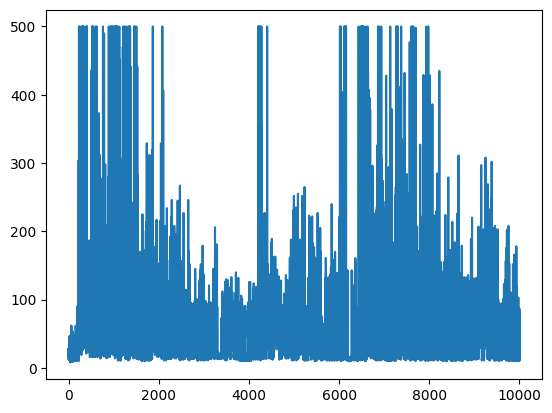

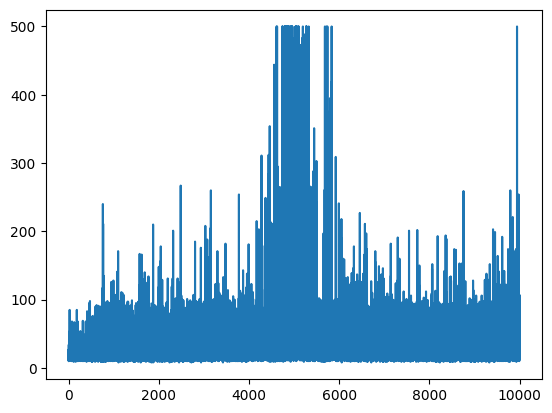

## Avaliação

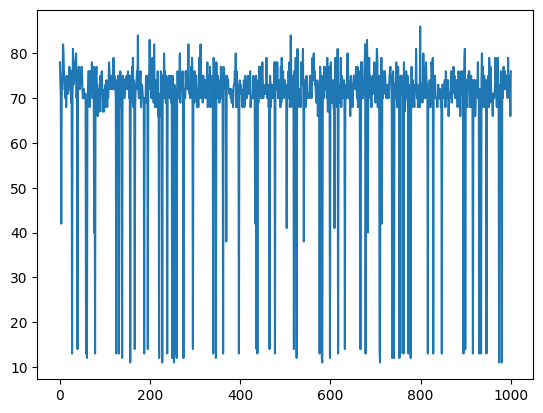

In [ ]:
eval_score = []
mean_100_eval_score = []

for i in range(1001):
    eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
    if (i%100)==0:
      if i!=0:
        mean_100_eval_score.append(np.mean(eval_score[-100]))

plt.plot(eval_score)
plt.show()

100 - 36 s

1000 - 5m

In [ ]:
eval_score_mean = np.mean(mean_100_eval_score)
eval_score_mean

72.9

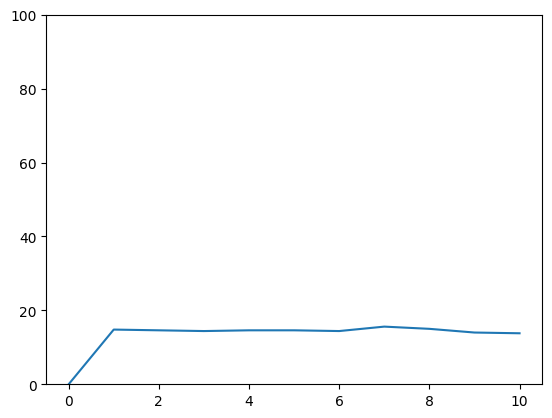

In [ ]:
# c = b/.500
# plt.plot(c)
# plt.show()
Sucessos = [0]
for i in mean_100_eval_score:
  # if (i%1000)==0:
  #   print(i)
  bb = (i/500)*100
  Sucessos.append(bb)
plt.plot(Sucessos)
plt.ylim(0,100)
plt.show()

In [ ]:
Desempenho_Medio = np.mean(Sucessos[-10])
Desempenho_Medio

14.799999999999999

## Salvar Resultados

In [ ]:
def salvar_array(score_list_1,
                 Sucessos,
                 Desempenho_Medio,
                 eval_score,
                 versao="V1",
                 epoch=1,
                 caminho_arquivo = '/content/drive/My Drive/CBA 2024/Resultados/'):

    recomp_ep = np.array(score_list_1)#.reshape(-1, 1)
    recomp_ep_eval = np.array(eval_score)#.reshape(-1, 1)
    sucess_rates = np.array(Sucessos)#.reshape(-1, 1)
    recomp_med_eval_ep = np.array(Desempenho_Medio).reshape(1, )


    array_coluna1 = recomp_ep
    array_coluna2 = recomp_ep_eval
    array_coluna3 = sucess_rates
    array_coluna4 = recomp_med_eval_ep


    # Preenchendo os arrays com tamanhos diferentes para que tenham o mesmo tamanho
    tamanho_maximo = max(len(array_coluna1), len(array_coluna2), len(array_coluna3), len(array_coluna4))
    array_coluna1 = np.pad(array_coluna1, (0, tamanho_maximo - len(array_coluna1)), mode='constant', constant_values=-9999)
    array_coluna2 = np.pad(array_coluna2, (0, tamanho_maximo - len(array_coluna2)), mode='constant', constant_values=-9999)
    array_coluna3 = np.pad(array_coluna3, (0, tamanho_maximo - len(array_coluna3)), mode='constant', constant_values=-9999)
    array_coluna4 = np.pad(array_coluna4, (0, tamanho_maximo - len(array_coluna4)), mode='constant', constant_values=-9999)

    # Criando o DataFrame com os arrays de colunas
    df = pd.DataFrame({'Rewards_ep': array_coluna1,
                   'Rewards_ep_eval': array_coluna2,
                   'Sucess_Rates': array_coluna3,
                       'Mean_Sucess_Rates': array_coluna4})

    # Substituindo os valores de preenchimento por None
    df = df.replace(-9999, None)
    # Salvando o DataFrame em uma planilha Excel
    # caminho_arquivo = 'Result_of_Epoch_'+ str(epoch) +'.xlsx'
    # caminho_arquivo = '/content/drive/My Drive/CBA 2024/Resultados/'
    nome_arquivo = '/Result_of_Epoch_'+ str(epoch) + '_' + str(versao) +'.xlsx'
    caminho_completo = caminho_arquivo + nome_arquivo
    df.to_excel(caminho_completo, index=False)

    print("DataFrame salvo em", caminho_completo)

In [ ]:
def carrega_array(versao,
                  epoch=1,
                  caminho_arquivo = '/content/drive/My Drive/CBA 2024/Resultados/'):
    # Substitua o caminho do arquivo pelo caminho real no seu Google Drive
    # caminho_do_arquivo = '/content/drive/My Drive/CBA 2024/Resultados//Result_of_Epoch_'+ str(epoch) + '_' + str(versao) +'.xlsx'
    nome_arquivo = '/Result_of_Epoch_'+ str(epoch) + '_' + str(versao) +'.xlsx'
    caminho_completo = caminho_arquivo + nome_arquivo

    # Carregue a planilha usando o pandas
    # df = pd.read_excel(caminho_do_arquivo)
    df = pd.ExcelFile(caminho_completo)
    # acoes = df.parse('Ações (A)')
    # resultado = df.parse()
    resultado = df.parse('Sheet1')
    # empresa = np.array(acoes.Empresas)

    # Exiba o DataFrame para verificar se a leitura foi bem-sucedida
    # acoes.head()
    # resultado.head()

    # # Plotagem
    # # from matplotlib import pyplot as plt
    # plt.figure()
    # # plt.subplot(1, 2, 1)  # Subplot 1
    # resultado['Rewards_ep'].plot(kind='line', figsize=(8, 4), title='Rewards_ep_train')
    # plt.gca().spines[['top', 'right']].set_visible(False)

    # plt.figure()
    # # plt.subplot(1, 2, 1)  # Subplot 1
    # resultado['Rewards_ep_eval'].plot(kind='line', figsize=(8, 4), title='Rewards_ep_eval')
    # plt.gca().spines[['top', 'right']].set_visible(False)


    # # from matplotlib import pyplot as plt
    # plt.figure()
    # # plt.subplot(1, 2, 2)  # Subplot 2
    # resultado['Sucess_Rates'].plot(kind='line', figsize=(8, 4), title='Sucess_Rates')
    # plt.gca().spines[['top', 'right']].set_visible(False)

    return resultado

## Salvando e carregando

In [ ]:
salvar_array(score_list_1, Sucessos, Desempenho_Medio, eval_score, "V1", 11)

DataFrame salvo em /content/drive/My Drive/CBA 2024/Resultados//Result_of_Epoch_10_V1.xlsx


In [ ]:
# resultado_1_V1 = carrega_array("V1", 1)

In [ ]:
resultado = []
for i in range(1, 11):
  resultado.append(carrega_array("V1", i))

## Resultado Médio

In [ ]:
soma_resultado = 0
for i in resultado:
  soma_resultado += i
resultado_medio_V1 = soma_resultado/10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


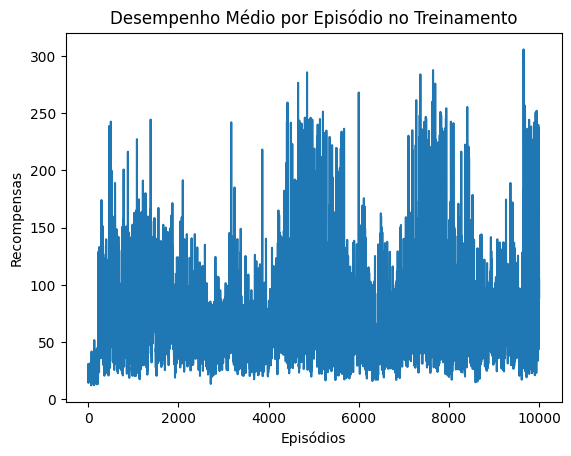

In [ ]:
# resultado_medio_V1 = (resultado_1_V1 +
#                    resultado_2_V1 +
#                    resultado_3_V1 +
#                    resultado_4_V1 +
#                    resultado_5_V1 +
#                    resultado_6_V1 +
#                    resultado_7_V1 +
#                    resultado_8_V1 +
#                    resultado_9_V1 +
#                    resultado_10_V1) / 10 # Melhoria: Criar uma lista com os resultados quando for carregar, fica mais fácil para tirar a média
plotar(resultado_medio_V1['Rewards_ep'], xlabel = 'Episódios', ylabel = 'Recompensas', title = 'Desempenho Médio por Episódio no Treinamento')

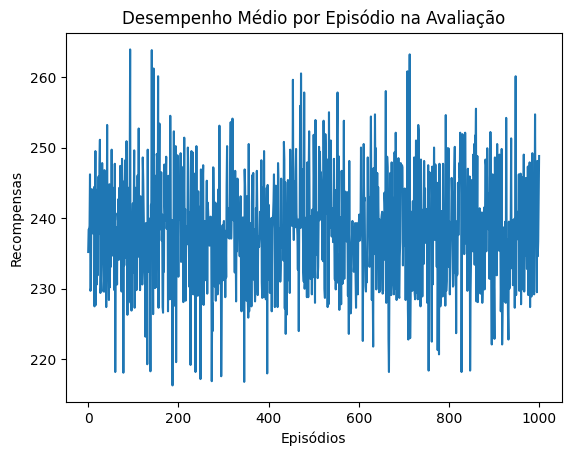

In [ ]:
plotar(resultado_medio_V1['Rewards_ep_eval'], xlabel = 'Episódios', ylabel = 'Recompensas', title = 'Desempenho Médio por Episódio na Avaliação')

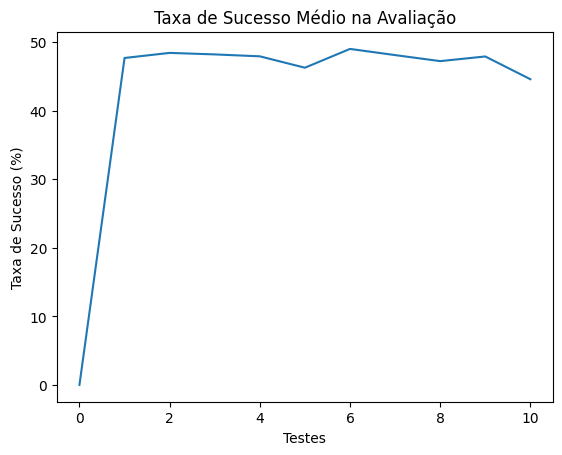

In [ ]:
plotar(resultado_medio_V1['Sucess_Rates'], xlabel = 'Testes', ylabel = 'Taxa de Sucesso (%)', title = 'Taxa de Sucesso Médio na Avaliação')

## Renderização

Por fim, executamos o ambiente em tantas etapas quanto possível e salvamos o vídeo localmente (observe que não estamos explorando).

In [ ]:
# # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
# record_env.rollout(max_steps=1000, policy=policy)
# # max_steps=1000: Define o número máximo de passos a serem executados durante o rollout.
# # policy=policy: A política que o agente deve seguir durante a execução.

# # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
# video_recorder.dump()

In [ ]:
# logger # CSVLogger(exp_name=dqn, experiment=CSVExperiment(log_dir=./training_loop/dqn))

# V2: DQN + PER

## Instalações

In [ ]:
!pip install tensordict
# Esse pacote é uma biblioteca que fornece um dicionário de tensores
# (estrutura de dados para armazenar e manipular múltiplos tensores, que são fundamentais em muitas operações de aprendizado de máquina e computação científica).
!pip install torchrl
# Este pacote é relacionado ao uso da biblioteca PyTorch para Reinforcement Learning (RL, ou Aprendizado por Reforço).
# torchrl é um complemento focado em fornecer ferramentas e utilitários específicos para Aprendizado por Reforço.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

In [ ]:
!pip install --upgrade torch torchvision
# torch refere-se ao PyTorch,
# biblioteca de aprendizado de máquina utilizada para aplicações de deep learning, especialmente em visão computacional e processamento de linguagem natural.
# torchvision é uma biblioteca que complementa o PyTorch com ferramentas específicas para visão computacional.
# Ela inclui conjuntos de dados (datasets) populares, modelos de redes neurais pré-treinados, e funções para transformar imagens.

In [ ]:
!pip install av
# av é uma biblioteca de Python que proporciona uma interface simplificada para a manipulação de áudio e vídeo.
# Esta biblioteca é um contêiner sobre a popular biblioteca de multimídia FFmpeg,
# que é capaz de decodificar, codificar, transcodificar, mux, demux, stream, filtrar e reproduzir praticamente tudo que os seres humanos e máquinas criaram.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 14.9 MB/s eta 0:00:00


## Importações

In [ ]:
import torch #  permitindo operações avançadas de aprendizado de máquina e manipulação de tensores.
import time #  oferece funcionalidades relacionadas ao tempo, como obter a hora atual, pausar a execução do programa, e medir intervalos de tempo.

In [ ]:
import torchvision  # fornece:
# Modelos de redes neurais pré-treinados.
# Conjuntos de dados populares para visão computacional.
# Ferramentas para transformar e manipular imagens.
# Utilitários adicionais para facilitar o trabalho com dados de imagem.

In [ ]:
import numpy as np

In [ ]:
from torchrl.envs import GymEnv, StepCounter, TransformedEnv
# GymEnv: Classe que integra ambientes do OpenAI Gym com a biblioteca torchrl, permitindo o uso de ambientes padrão de Reinforcement Learning.
# StepCounter: Um wrapper para contar o número de passos realizados em um ambiente.
# TransformedEnv: Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas.
from torchrl.modules import EGreedyModule, MLP, QValueModule
# EGreedyModule: Implementa uma política epsilon-greedy, que escolhe ações aleatoriamente com probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# MLP: Multi-Layer Perceptron, uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# QValueModule: Um módulo específico para calcular valores Q, usados em algoritmos de Q-learning.
from torchrl.collectors import SyncDataCollector
# SyncDataCollector: Coletor de dados síncrono, usado para coletar experiências do ambiente de forma síncrona, que é necessário para treinar modelos de RL.
from torchrl.data import LazyTensorStorage, ReplayBuffer
# LazyTensorStorage: Armazena tensores de maneira eficiente, com carregamento atrasado.
# ReplayBuffer: Buffer de replay, usado para armazenar e amostrar experiências anteriores, crucial para métodos de RL como DQN.
from torchrl.objectives import DQNLoss, SoftUpdate
# DQNLoss: Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
# SoftUpdate: Função para atualização suave dos parâmetros do modelo, frequentemente usada em algoritmos de RL para atualizar gradualmente uma rede alvo.
from torchrl._utils import logger as torchrl_logger
# logger: Utilitário de registro (logging) usado internamente pela biblioteca torchrl para registrar mensagens de depuração e informações durante a execução.
from torchrl.record import CSVLogger, VideoRecorder
# CSVLogger: Logger que registra dados em um arquivo CSV, útil para monitorar o treinamento e resultados.
# VideoRecorder: Grava vídeos das execuções dos ambientes, útil para visualizar o comportamento de agentes de RL.

from tensordict.nn import TensorDictModule as Mod, TensorDictSequential as Seq
# TensorDictModule (Mod): Um módulo que opera sobre TensorDicts, que são dicionários especializados em armazenar tensores.
# TensorDictSequential (Seq): Similar ao torch.nn.Sequential, mas opera sobre TensorDicts,
# permitindo a construção de modelos sequenciais que trabalham com múltiplos tensores de entrada e saída.

from torch.optim import Adam
# Adam: Um otimizador amplamente utilizado, que combina as vantagens dos métodos AdaGrad e RMSProp,
# ajustando os passos de atualização com base em estimativas de momentos de primeira e segunda ordem dos gradientes.

from torchrl.data.replay_buffers.samplers import PrioritizedSampler

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# from matplotlib import pyplot as plt

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Construindo o ambiente - OK

Estaremos usando um ambiente de academia com uma StepCounter transformação. Se precisar de uma atualização, verifique se esses recursos são apresentados no tutorial do ambiente .

In [ ]:
torch.manual_seed(0) # define a semente manual para a geração de números aleatórios no PyTorch, garantindo a reprodutibilidade dos resultados.
env = TransformedEnv(GymEnv("CartPole-v1"), StepCounter())
# cria um ambiente de RL para o ambiente "CartPole-v1" do OpenAI Gym, com um contador de passos adicionado como uma transformação ao ambiente.
env.set_seed(0) # define a semente para o ambiente env, garantindo a consistência do comportamento do ambiente em diferentes execuções.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


795726461

## Projetando uma política - OK

O próximo passo é construir nossa política. Faremos uma versão regular e determinística do ator para ser usada no módulo de perda e durante a avaliação . A seguir, iremos aumentá-lo com um módulo de exploração para inferência .

In [ ]:
# Essa linha cria uma MLP que mapeia observações do ambiente para valores de ação, com duas camadas ocultas de 64 neurônios cada.
value_mlp = MLP(out_features=env.action_spec.shape[-1], num_cells=[64, 64])
# MLP: Refere-se a um Multi-Layer Perceptron (MLP), uma rede neural feed-forward composta por múltiplas camadas densamente conectadas.
# out_features=env.action_spec.shape[-1]: Define o número de neurônios na camada de saída da MLP.
# env.action_spec.shape[-1] é a dimensão do espaço de ações do ambiente, o que significa que a MLP vai produzir um valor para cada ação possível no ambiente.
# num_cells=[64, 64]: Define a arquitetura da MLP, com duas camadas ocultas, cada uma contendo 64 neurônios.

# Essa linha cria um módulo que pega as observações do ambiente (observation) e produz valores de ação (action_value) usando a MLP definida anteriormente.
value_net = Mod(value_mlp, in_keys=["observation"], out_keys=["action_value"])
# Mod: Refere-se ao TensorDictModule, que é um módulo que opera sobre TensorDicts.
# value_mlp: A MLP criada na linha anterior.
# in_keys=["observation"]: Define as chaves de entrada para o módulo. Aqui, o módulo espera uma chave chamada observation no TensorDict de entrada.
# out_keys=["action_value"]: Define as chaves de saída para o módulo. O módulo irá produzir uma chave chamada action_value no TensorDict de saída.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
# Cria uma política que primeiro passa a observação através da value_net para obter os valores de ação
# e, em seguida, usa o QValueModule para calcular os valores Q para as ações.
policy = Seq(value_net, QValueModule(spec=env.action_spec))
# Seq: Refere-se ao TensorDictSequential, que é similar ao torch.nn.Sequential, mas opera sobre TensorDicts.
# value_net: O módulo criado na linha anterior.
# QValueModule(spec=env.action_spec): Um módulo específico para calcular valores Q, usado em algoritmos de Q-learning.
# spec=env.action_spec fornece as especificações do espaço de ações do ambiente.

# Cria um módulo de exploração que implementa uma estratégia epsilon-greedy com um valor inicial de epsilon de 0.5 e que diminui ao longo de 100.000 passos.
exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=100_000, eps_init=0.5)
# exploration_module = EGreedyModule(env.action_spec, annealing_num_steps=345, eps_init=1)
# EGreedyModule: Implementa política epsilon-greedy, que escolhe ações aleatoriamente com certa probabilidade epsilon, e a melhor ação com probabilidade 1-epsilon.
# env.action_spec: As especificações do espaço de ações do ambiente.
# annealing_num_steps=100_000: Define o número de passos durante os quais o valor de epsilon será reduzido gradualmente (annealing).
# eps_init=0.5: Define o valor inicial de epsilon. No início, 50% das ações serão escolhidas aleatoriamente.

# Essa linha combina a política com o módulo de exploração em uma sequência, resultando em uma política que primeiro calcula os valores de ação
# e, em seguida, aplica a estratégia epsilon-greedy para selecionar as ações.
policy_explore = Seq(policy, exploration_module)  # Seq: Refere-se ao TensorDictSequential.
# policy: A política definida anteriormente.
# exploration_module: O módulo de exploração epsilon-greedy definido na linha anterior.

Passando de e- decay = 0,98 para propocional em passos:

\begin{align}
 ϵ_{\mbox{inicial}} * ϵ_{\mbox{decay}}^{n_p} = ϵ_{\mbox{mínimo}}
\end{align}

\begin{align}
 n_p = (\frac{\log ϵ_{\mbox{mínimo}} - \log ϵ_{\mbox{inicial}} }{\log ϵ_{\mbox{decay}}})
\end{align}

\begin{align}
 n_p ≈ 345
\end{align}



## Coletor de dados e buffer de reprodução

Aí vem a parte dos dados: precisamos de um coletor de dados para obter facilmente lotes de dados e um buffer de reprodução para armazenar esses dados para treinamento.

In [ ]:
init_rand_steps = 5000    # Define o número inicial de passos aleatórios a serem realizados no ambiente antes de começar a usar a política treinada.
frames_per_batch = 200    # Define o número de frames (ou passos de tempo) que serão coletados em cada lote (batch) de coleta de dados do ambiente.
optim_steps = 10          # Define o número de passos de otimização que serão realizados após cada lote de coleta de dados.
# Isso controla quantas atualizações dos pesos da rede neural serão feitas com base nos dados coletados.

# SyncDataCollector: Um coletor de dados síncrono que coleta experiências do ambiente usando a política fornecida.
collector = SyncDataCollector(
    env,                                  # env: O ambiente de RL, criado anteriormente com TransformedEnv.
    policy,                               # policy: A política usada para coletar experiências do ambiente.
    # policy_explore,
    frames_per_batch=frames_per_batch,    # frames_per_batch=frames_per_batch: Especifica que 200 frames serão coletados em cada lote.
    total_frames=-1,                      # total_frames=-1: Especifica que o coletor deve continuar indefinidamente (ou até que seja explicitamente parado).
    init_random_frames=init_rand_steps,   # init_random_frames=init_rand_steps: 5000 passos aleatórios realizados inicialmente p/ preencher o rb.
)

# rb = ReplayBuffer(storage=LazyTensorStorage(100_000)) # Buffer de replay usado p/ armazenar experiências anteriores p/ amostragem durante o treinamento.
# # LazyTensorStorage(100_000): Um armazenamento eficiente de tensores que pode armazenar até 100.000 transições.

size = 100_000

rb = ReplayBuffer(
    storage=LazyTensorStorage(size),
    sampler=PrioritizedSampler(
        max_capacity=size,            # A capacidade máxima do amostrador, que deve ser consistente com o tamanho do buffer de replay.
        alpha=0.8,                    # Controla quão fortemente a prioridade afeta a amostragem. Valores maiores de @: amostragem dependa mais das prioridades.
        beta=1.1),                    # O parâmetro de correção de viés de importância. Valores maiores de beta aumentam a correção.
    collate_fn=lambda x: x,           # Define como os dados são agrupados quando amostrados do buffer de replay.
)                                     # lambda x: x: retorna os dados como estão, sem nenhuma modificação ou agrupamento adicional.

# rb = TensorDictReplayBuffer(
#     storage=LazyTensorStorage(100_000),
#     sampler=PrioritizedSampler(size, alpha=0.8, beta=1.1),
#     priority_key="td_error",
#     batch_size=1024,
# )

### PER

Estender o buffer de reprodução retorna os índices dos itens, dos quais precisaremos mais tarde para atualizar a prioridade:

In [ ]:
# indices = rb.extend([1, "foo", None])

O amostrador espera ter uma prioridade para cada elemento. Quando adicionada ao buffer, a prioridade é definida com um valor padrão de 1. Depois que a prioridade for calculada (geralmente por meio da perda), ela deverá ser atualizada no buffer.

Isso é feito por meio do update_priority() método, que requer os índices e também a prioridade. Atribuímos uma prioridade artificialmente alta à segunda amostra no conjunto de dados para observar seu efeito na amostragem:

In [ ]:
# rb.update_priority(index=indices, priority=torch.tensor([0, 1_000, 0.1]))

Observamos que a amostragem do buffer retorna principalmente a segunda amostra ( "foo"):

In [ ]:
# sample, info = rb.sample(10, return_info=True)
# print(sample)

As informações contêm os pesos relativos dos itens, bem como os índices.

In [ ]:
# print(info)

Vemos que usar um buffer de repetição priorizado requer uma série de etapas extras no loop de treinamento em comparação com um buffer normal:

Após coletar os dados e estender o buffer, a prioridade dos itens deve ser atualizada;

Após calcular a perda e obter um “sinal de prioridade” dela, devemos atualizar novamente a prioridade dos itens no buffer. Isso exige que acompanhemos os índices.

Isso dificulta drasticamente a reutilização do buffer: se alguém quiser escrever um script de treinamento onde um buffer priorizado e um regular possam ser criados, ele deverá adicionar uma quantidade considerável de fluxo de controle para garantir que os métodos apropriados sejam chamados no momento apropriado. lugar, se e somente se um buffer priorizado estiver sendo usado.

Vamos ver como podemos melhorar isso com TensorDict. Vimos que os TensorDictReplayBufferdados de retorno aumentaram com seus índices de armazenamento relativos. Um recurso que não mencionamos é que esta classe também garante que o sinal de prioridade seja automaticamente analisado para o amostrador priorizado, se presente durante a extensão.

A combinação desses recursos simplifica as coisas de diversas maneiras: - Ao estender o buffer, o sinal de prioridade será automaticamente

analisado se presente e a prioridade será atribuída com precisão;

Os índices serão armazenados nos tensorditos amostrados, facilitando a atualização da prioridade após o cálculo da perda.

Ao calcular a perda, o sinal de prioridade será registrado no tensordito passado para o módulo de perdas, possibilitando a atualização dos pesos sem esforço:

In [ ]:
# data = replay_buffer.sample()
# loss_val = loss_module(data)
# replay_buffer.update_tensordict_priority(data)

O código a seguir ilustra esses conceitos. Construímos um buffer de replay com um sampler priorizado e indicamos no construtor a entrada onde o sinal de prioridade deve ser buscado:

In [ ]:
# rb = TensorDictReplayBuffer(
#     storage=ListStorage(size),
#     sampler=PrioritizedSampler(size, alpha=0.8, beta=1.1),
#     priority_key="td_error",
#     batch_size=1024,
# )

Escolhamos um sinal de prioridade que seja proporcional ao índice de armazenamento:

In [ ]:
# data["td_error"] = torch.arange(data.numel())

# rb.extend(data)

# sample = rb.sample()

índices mais altos devem ocorrer com mais frequência:

In [ ]:
# plt.hist(sample["index"].numpy())

Depois de trabalharmos com nossa amostra, atualizamos a chave de prioridade usando o torchrl.data.TensorDictReplayBuffer.update_tensordict_priority() método. Para mostrar como isso funciona, vamos reverter a prioridade dos itens amostrados:

In [ ]:
# sample = rb.sample()
# sample["td_error"] = data.numel() - sample["index"]
# rb.update_tensordict_priority(sample)

Agora, índices mais elevados devem ocorrer com menor frequência:

In [ ]:
# sample = rb.sample()

# plt.hist(sample["index"].numpy())

## Módulo de perda e otimizador - Ok

Construímos nossa perda conforme indicado no tutorial dedicado , com seu otimizador e atualizador de parâmetros de destino:

In [ ]:
#  Implementa a função de perda para o algoritmo DQN (Deep Q-Network).
loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True)
# value_network=policy: A rede de valor utilizada para calcular os valores Q. Aqui, policy é a política criada anteriormente, que inclui o QValueModule.
# action_space=env.action_spec: Especifica o espaço de ações do ambiente, utilizado para calcular os valores Q para todas as ações possíveis.
# delay_value=True: Indica que a rede alvo (target network) deve ser usada para calcular os valores Q futuros, o que é uma técnica comum para estabilizar o treinamento em DQN.

# Um otimizador amplamente utilizado que combina as vantagens dos métodos AdaGrad e RMSProp. É particularmente eficiente para grandes problemas de aprendizado de máquina com muitos parâmetros.
optim = Adam(loss.parameters(), lr=0.02)
# loss.parameters(): Passa os parâmetros da função de perda (que incluem os parâmetros da rede de valor) para o otimizador.
# lr=0.02: Define a taxa de aprendizado (learning rate) como 0.02. Esta taxa controla o tamanho dos passos de atualização dos pesos da rede neural durante o treinamento.

# Implementa a atualização suave dos parâmetros da rede, uma técnica comum em algoritmos de RL para atualizar gradualmente uma rede alvo (target network) com os parâmetros da rede de valor (online network).
updater = SoftUpdate(loss, eps=0.99)
# loss: A função de perda que contém os parâmetros da rede de valor e da rede alvo.
# eps=0.99: Define o fator de atualização suave (soft update factor).
# eps=0.99 indica que 99% dos parâmetros da rede alvo são mantidos e apenas 1% é atualizado a partir da rede de valor em cada passo.

## Registrador

Usaremos um registrador CSV para registrar nossos resultados e salvar vídeos renderizados.

In [ ]:
path = "./training_loop" # Define o diretório onde os logs e outros dados do treinamento serão salvos. Neste caso, é um diretório local chamado training_loop.

# CSVLogger: Um logger que registra dados em formato CSV, útil para monitorar o progresso do treinamento e analisar resultados.
logger = CSVLogger(exp_name="dqn", log_dir=path, video_format="mp4")
# exp_name="dqn": Nome da experiência, usado como um identificador para os logs. Aqui, é definido como "dqn" (Deep Q-Network).
# log_dir=path: Diretório onde os logs serão salvos. Neste caso, é o diretório definido anteriormente, ./training_loop.
# video_format="mp4": Especifica o formato de vídeo para gravação. Aqui, está configurado para MP4.

# Um objeto que grava vídeos das execuções do ambiente durante o treinamento, útil para visualizar o comportamento do agente.
video_recorder = VideoRecorder(logger, tag="video")
# logger: O logger criado na linha anterior, que será usado para salvar os vídeos.
# tag="video": Uma tag para identificar os vídeos nos logs. Aqui, está definido como "video".

# Um wrapper que aplica transformações ao ambiente, como normalização de observações ou recompensas, e também permite a adição de funcionalidades como gravação de vídeos.
record_env = TransformedEnv(GymEnv("CartPole-v1", from_pixels=True, pixels_only=False), video_recorder)
# GymEnv("CartPole-v1", from_pixels=True, pixels_only=False): Cria um ambiente GymEnv para o ambiente "CartPole-v1" do OpenAI Gym.
# from_pixels=True: Indica que o ambiente será renderizado a partir de pixels, permitindo a gravação visual do ambiente.
# pixels_only=False: Indica que tanto as observações em forma de pixels quanto outras observações (como a posição e a velocidade do carrinho) serão retornadas pelo ambiente.
# video_recorder: O gravador de vídeos criado na linha anterior, que será usado para gravar as execuções do ambiente.

/usr/local/lib/python3.10/dist-packages/torchrl/envs/common.py:2989: DeprecationWarning: Your wrapper was not given a device. Currently, this value will default to 'cpu'. From v0.5 it will default to `None`. With a device of None, no device casting is performed and the resulting tensordicts are deviceless. Please set your device accordingly.
  warnings.warn(


## Funções Auxiliares

In [ ]:
def plotar(dados, xlabel = 'Episódio', ylabel = 'Recompensa', title = 'Desempenho do Agente'):
    plt.plot(dados)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Ciclo de treinamento

Em vez de fixar um número específico de iterações a serem executadas, continuaremos treinando a rede até que ela atinja um determinado desempenho (definido arbitrariamente como 200 etapas no ambiente – com CartPole, sucesso é definido como ter trajetórias mais longas).

/usr/local/lib/python3.10/dist-packages/gym/envs/classic_control/cartpole.py:179: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
2024-05-30 01:49:24,808 [torchrl][INFO] Episódios: 800, Record: 441, Tamanho do Buffer 100000
2024-05-30 01:49:36,481 [torchrl][INFO] Episódios: 900, Record: 441, Tamanho do Buffer 100000
2024-05-30 01:51:11,153 [torchrl][INFO] Episódios: 1400, Record: 500, Tamanho do Buffer 100000
2024-05-30 01:51:11,578 [torchrl][INFO] Episódios: 1400, Record: 500, Tamanho do Buffer 100000
2024-05-30 01:51:37,770 [torchrl][INFO] Episódios: 1500, Record: 500, Tamanho do Buffer 100000
2024-05-30 01:51:38,066 [torchrl][INFO] Episódios: 1500, Record: 500, Tamanho do Buffer 100000
2024-05-30 01:51:38,379 [torchrl][INFO] Episódios: 1500, Record: 500, Tamanho do Buffer 100000
2024-05-30 0

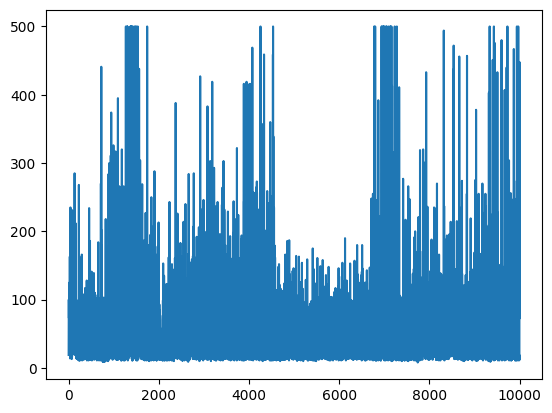

In [ ]:
### Linhas de Inicialização
total_count = 0     # Inicializa um contador para o número total de passos coletados.
total_episodes = 0  # Inicializa um contador para o número total de episódios completados.
X1 = None
score_list_1 = []
t0 = time.time()    # Armazena o tempo de início do treinamento para calcular a duração total no final.

### Loop principal do treinamento.
for i, data in enumerate(collector):

    for X0 in data["next","step_count"]:
      if X1 is not None:
          if X0<X1:
              score_list_1.append(X1.item())
      X1 = X0

    # data["td_error"] = torch.arange(data.numel())

    # rb.extend(data)                                 # Grava dados no buffer de repetição
    indices = rb.extend(data)

    max_length = rb[:]["next", "step_count"].max()  # Calcula o comprimento máx. dos episódios armazenados no buffer de replay, acessando o campo "step_count".

    ### Condição para Iniciar a Otimização
    if len(rb) > init_rand_steps:         # Verifica se o tamanho do buffer de replay é maior que init_rand_steps (5000).
        ### Loop de Otimização
        for _ in range(optim_steps):      # Realiza várias etapas de otimização para cada lote de dados coletados para maior eficiência.
            # sample = rb.sample(200)       # Amostra 200 transições do buffer de replay.
            sample, info = rb.sample(200, return_info=True)
            loss_vals = loss(sample)      # Calcula os valores de perda usando a amostra

            # sample["td_error"] = data.numel() - sample["index"]
            # rb.update_tensordict_priority(sample)



            # rb.update_tensordict_priority(sample)
            rb.update_priority(index=info['index'], priority=loss_vals["loss"])


            loss_vals["loss"].backward()  # Calcula os gradientes da perda.
            optim.step()                  # Atualiza os parâmetros da rede usando o otimizador.
            optim.zero_grad()             # Zera os gradientes acumulados para a próxima iteração.

            ### Atualização do Fator de Exploração
            exploration_module.step(data.numel()) # Atualiza o fator de exploração baseado no número de elementos em data.

            ### Atualização dos Parâmetros da Rede-alvo
            updater.step() # Realiza a atualização suave dos parâmetros da rede-alvo.

    ### Registra informações sobre o número máximo de passos e o tamanho do buffer de replay.
    total_count += data.numel()                   # Atualiza o contador total de passos coletados.
    total_episodes += data["next", "done"].sum()  # Atualiza o contador total de episódios completados.

    ### Monitoramento e Registro
    # if i % 100:
    if (total_episodes % 100)==0:
        # torchrl_logger.info(f"Record: {max_length}, Tamanho do Buffer {len(rb)}")
        torchrl_logger.info(f"Episódios: {total_episodes}, Record: {max_length}, Tamanho do Buffer {len(rb)}")

    ### Condição de Parada
    # if max_length == 500:
    if total_episodes >= 10000:
        break

### Cálculo e Registro do Tempo Total de Treinamento
t1 = time.time() # Armazena o tempo de término do treinamento.
torchrl_logger.info(f"Resolvido depois de {total_count} passos, {total_episodes} episódios em {t1-t0}s.")
plt.plot(score_list_1)
plt.show()

2024-05-23 13:40:35,303 [torchrl][INFO] solved after 109000 steps, 1001 episodes and in 188.57629585266113s. (3m)

2024-05-23 20:29:44,710 [torchrl][INFO] Resolvido depois de 600000 passos, 5002 episódios em 755.278256893158s. (12m35s)

2024-05-25 14:57:05,719 [torchrl][INFO] Resolvido depois de 457800 passos, 6002 episódios em 996.2224431037903s. (16m)

2024-05-23 16:06:03,731 [torchrl][INFO] solved after 3094200 steps, 10001 episodes and in 5190.080612421036s. (1h26m)

2024-05-25 21:59:55,043 [torchrl][INFO] Resolvido depois de 743600 passos, 10001 episódios em 1305.8049473762512s. (21m)

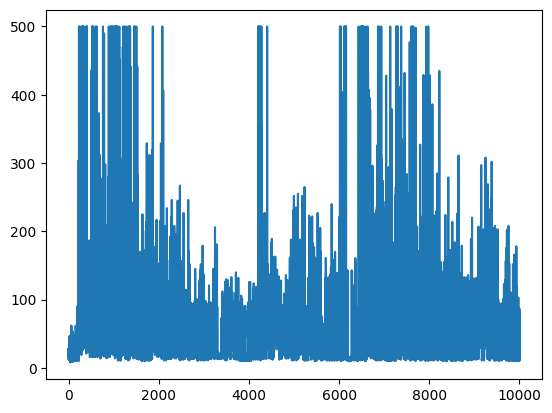

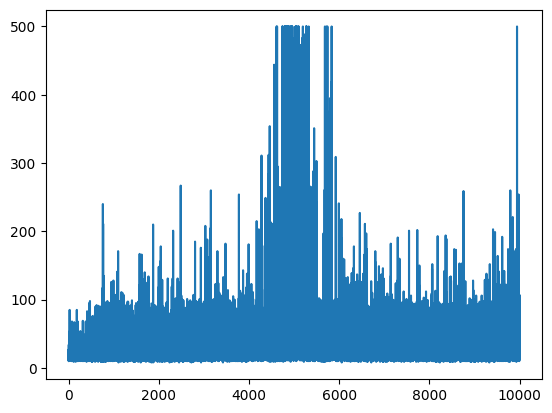

## Avaliação

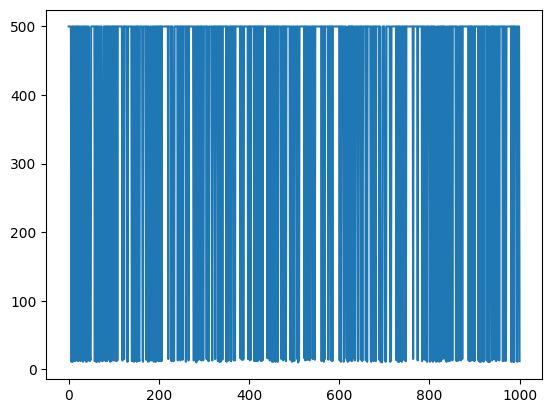

In [ ]:
eval_score = []
mean_100_eval_score = []

for i in range(1001):
    eval_score.append(env.rollout(max_steps=500, policy=policy)["next","step_count"][-1].item())
    if (i%100)==0:
      if i!=0:
        mean_100_eval_score.append(np.mean(eval_score[-100]))

plt.plot(eval_score)
plt.show()

100 - 36 s

1000 - 5m

In [ ]:
eval_score_mean = np.mean(mean_100_eval_score)
eval_score_mean

NameError: name 'np' is not defined

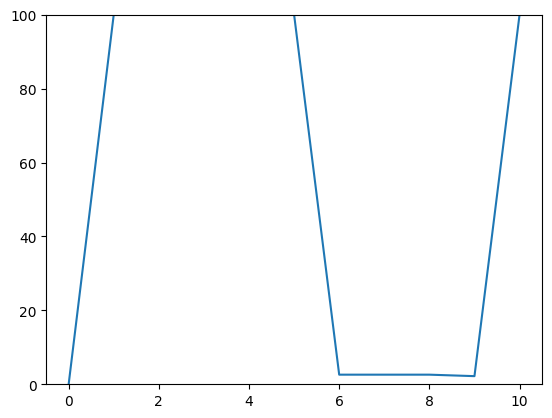

In [ ]:
# c = b/.500
# plt.plot(c)
# plt.show()
Sucessos = [0]
for i in mean_100_eval_score:
  # if (i%1000)==0:
  #   print(i)
  bb = (i/500)*100
  Sucessos.append(bb)
plt.plot(Sucessos)
plt.ylim(0,100)
plt.show()

In [ ]:
Desempenho_Medio = np.mean(Sucessos[-10])
Desempenho_Medio

100.0

## Salvar Resultados

In [ ]:
def salvar_array(score_list_1,
                 Sucessos,
                 Desempenho_Medio,
                 eval_score,
                 versao="V1",
                 epoch=1,
                 caminho_arquivo = '/content/drive/My Drive/CBA 2024/Resultados/'):

    recomp_ep = np.array(score_list_1)#.reshape(-1, 1)
    recomp_ep_eval = np.array(eval_score)#.reshape(-1, 1)
    sucess_rates = np.array(Sucessos)#.reshape(-1, 1)
    recomp_med_eval_ep = np.array(Desempenho_Medio).reshape(1, )


    array_coluna1 = recomp_ep
    array_coluna2 = recomp_ep_eval
    array_coluna3 = sucess_rates
    array_coluna4 = recomp_med_eval_ep


    # Preenchendo os arrays com tamanhos diferentes para que tenham o mesmo tamanho
    tamanho_maximo = max(len(array_coluna1), len(array_coluna2), len(array_coluna3), len(array_coluna4))
    array_coluna1 = np.pad(array_coluna1, (0, tamanho_maximo - len(array_coluna1)), mode='constant', constant_values=-9999)
    array_coluna2 = np.pad(array_coluna2, (0, tamanho_maximo - len(array_coluna2)), mode='constant', constant_values=-9999)
    array_coluna3 = np.pad(array_coluna3, (0, tamanho_maximo - len(array_coluna3)), mode='constant', constant_values=-9999)
    array_coluna4 = np.pad(array_coluna4, (0, tamanho_maximo - len(array_coluna4)), mode='constant', constant_values=-9999)

    # Criando o DataFrame com os arrays de colunas
    df = pd.DataFrame({'Rewards_ep': array_coluna1,
                   'Rewards_ep_eval': array_coluna2,
                   'Sucess_Rates': array_coluna3,
                       'Mean_Sucess_Rates': array_coluna4})

    # Substituindo os valores de preenchimento por None
    df = df.replace(-9999, None)
    # Salvando o DataFrame em uma planilha Excel
    # caminho_arquivo = 'Result_of_Epoch_'+ str(epoch) +'.xlsx'
    # caminho_arquivo = '/content/drive/My Drive/CBA 2024/Resultados/'
    nome_arquivo = '/Result_of_Epoch_'+ str(epoch) + '_' + str(versao) +'.xlsx'
    caminho_completo = caminho_arquivo + nome_arquivo
    df.to_excel(caminho_completo, index=False)

    print("DataFrame salvo em", caminho_completo)

In [ ]:
def carrega_array(versao,
                  epoch=1,
                  caminho_arquivo = '/content/drive/My Drive/CBA 2024/Resultados/'):
    # Substitua o caminho do arquivo pelo caminho real no seu Google Drive
    # caminho_do_arquivo = '/content/drive/My Drive/CBA 2024/Resultados//Result_of_Epoch_'+ str(epoch) + '_' + str(versao) +'.xlsx'
    nome_arquivo = '/Result_of_Epoch_'+ str(epoch) + '_' + str(versao) +'.xlsx'
    caminho_completo = caminho_arquivo + nome_arquivo

    # Carregue a planilha usando o pandas
    # df = pd.read_excel(caminho_do_arquivo)
    df = pd.ExcelFile(caminho_completo)
    # acoes = df.parse('Ações (A)')
    # resultado = df.parse()
    resultado = df.parse('Sheet1')
    # empresa = np.array(acoes.Empresas)

    # Exiba o DataFrame para verificar se a leitura foi bem-sucedida
    # acoes.head()
    # resultado.head()

    # # Plotagem
    # # from matplotlib import pyplot as plt
    # plt.figure()
    # # plt.subplot(1, 2, 1)  # Subplot 1
    # resultado['Rewards_ep'].plot(kind='line', figsize=(8, 4), title='Rewards_ep_train')
    # plt.gca().spines[['top', 'right']].set_visible(False)

    # plt.figure()
    # # plt.subplot(1, 2, 1)  # Subplot 1
    # resultado['Rewards_ep_eval'].plot(kind='line', figsize=(8, 4), title='Rewards_ep_eval')
    # plt.gca().spines[['top', 'right']].set_visible(False)


    # # from matplotlib import pyplot as plt
    # plt.figure()
    # # plt.subplot(1, 2, 2)  # Subplot 2
    # resultado['Sucess_Rates'].plot(kind='line', figsize=(8, 4), title='Sucess_Rates')
    # plt.gca().spines[['top', 'right']].set_visible(False)

    return resultado

## Salvando e carregando

In [ ]:
salvar_array(score_list_1, Sucessos, Desempenho_Medio, eval_score, "V2", 10)

DataFrame salvo em /content/drive/My Drive/CBA 2024/Resultados//Result_of_Epoch_10_V2.xlsx


In [ ]:
# resultado_2_V2 = carrega_array("V2", 3)
# resultado_2_V2

In [ ]:
resultado = []
for i in range(1, 11):
  resultado.append(carrega_array("V2", i))

## Resultado Médio

In [ ]:
soma_resultado = 0
for i in resultado:
  soma_resultado += i
resultado_medio_V1 = soma_resultado/10

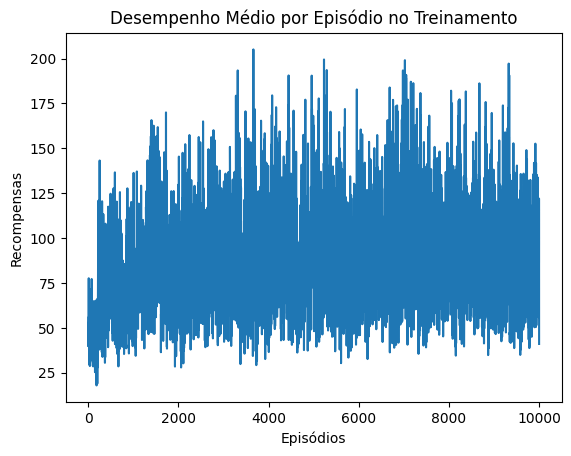

In [ ]:
# resultado_medio_V1 = (resultado_1_V1 +
#                    resultado_2_V1 +
#                    resultado_3_V1 +
#                    resultado_4_V1 +
#                    resultado_5_V1 +
#                    resultado_6_V1 +
#                    resultado_7_V1 +
#                    resultado_8_V1 +
#                    resultado_9_V1 +
#                    resultado_10_V1) / 10 # Melhoria: Criar uma lista com os resultados quando for carregar, fica mais fácil para tirar a média
plotar(resultado_medio_V1['Rewards_ep'], xlabel = 'Episódios', ylabel = 'Recompensas', title = 'Desempenho Médio por Episódio no Treinamento')

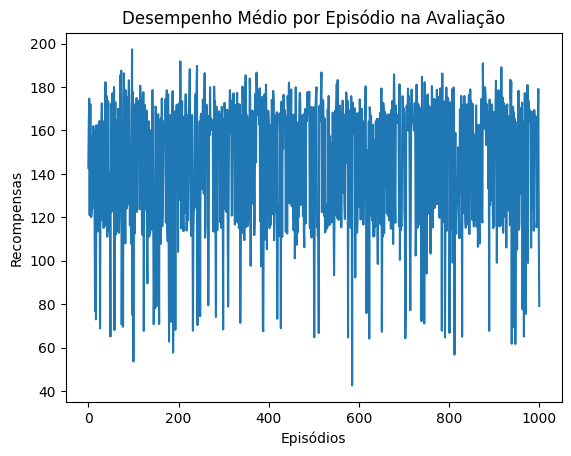

In [ ]:
plotar(resultado_medio_V1['Rewards_ep_eval'], xlabel = 'Episódios', ylabel = 'Recompensas', title = 'Desempenho Médio por Episódio na Avaliação')

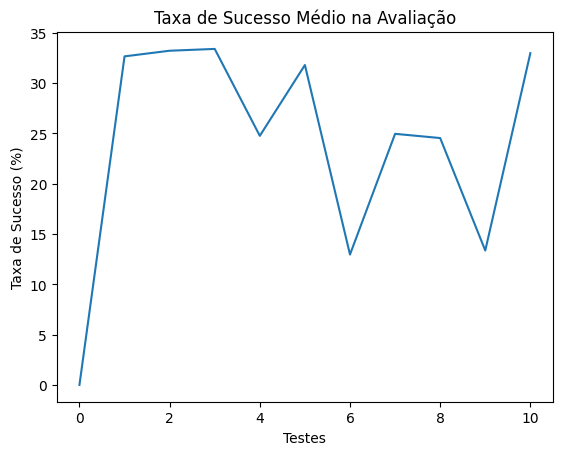

In [ ]:
plotar(resultado_medio_V1['Sucess_Rates'], xlabel = 'Testes', ylabel = 'Taxa de Sucesso (%)', title = 'Taxa de Sucesso Médio na Avaliação')

## Renderização

Por fim, executamos o ambiente em tantas etapas quanto possível e salvamos o vídeo localmente (observe que não estamos explorando).

In [ ]:
# # Método que realiza uma execução no ambiente, coletando observações, ações, recompensas e outras informações.
# record_env.rollout(max_steps=1000, policy=policy)
# # max_steps=1000: Define o número máximo de passos a serem executados durante o rollout.
# # policy=policy: A política que o agente deve seguir durante a execução.

# # Método que salva os vídeos gravados durante as execuções no ambiente para o disco, utilizando o logger configurado anteriormente.
# video_recorder.dump()

In [ ]:
# logger # CSVLogger(exp_name=dqn, experiment=CSVExperiment(log_dir=./training_loop/dqn))